In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("results/mnist.csv")

In [3]:
dataframe.head()

,epochs,learning_rate,is_regularized,quantile,best_loss,use_clipping
0,3,0.00001,True,0.50,0.312493,True
1,3,0.00001,True,0.70,0.317410,True
2,3,0.00001,True,0.80,0.298116,True
3,3,0.00001,True,0.90,0.317231,True
4,3,0.00001,True,0.95,0.296054,True


In [4]:
# Calculate the variance of the trials where epochs=5, learning_rate=1e-3 and use_clipping=False
print(dataframe[(dataframe["epochs"] == 5) & (dataframe["learning_rate"] == 1e-3) & (dataframe["use_clipping"] == False)]["best_loss"])
variance = dataframe[(dataframe["epochs"] == 5) & (dataframe["learning_rate"] == 1e-3) & (dataframe["use_clipping"] == False)]["best_loss"].var()
variance

1291    0.024823
1292    0.024841
1293    0.026196
1294    0.022768
1295    0.024619
1296    0.023918
1297    0.024209
1298    0.024861
1299    0.023330
1300    0.024350
1301    0.026540
1302    0.024029
1303    0.025247
1304    0.024806
1305    0.025178
1306    0.025282
1307    0.024609
1308    0.026477
1309    0.023608
1310    0.025547
1311    0.023917
1312    0.024574
1313    0.025351
1314    0.024881
1315    0.025024
1316    0.023343
1317    0.025889
1318    0.025059
1319    0.024576
1320    0.024482
Name: best_loss, dtype: float64


8.020565815235175e-07

In [5]:
# Average results where epochs, learning_rate, is_regularized, and quantile are the same
dataframe = dataframe.groupby(["epochs", "learning_rate", "is_regularized", "quantile", "use_clipping"]).mean().reset_index()

In [6]:
dataframe[dataframe["best_loss"] == min(dataframe["best_loss"])]

,epochs,learning_rate,is_regularized,quantile,use_clipping,best_loss
78,5,0.001,False,0.9,True,0.024298


In [7]:
dataframe[dataframe["best_loss"] < min(dataframe["best_loss"]) + 0.001]

,epochs,learning_rate,is_regularized,quantile,use_clipping,best_loss
78,5,0.001,False,0.90,True,0.024298
79,5,0.001,False,0.95,True,0.025185
80,5,0.001,False,0.99,True,0.024656
81,5,0.001,False,1.00,False,0.024744
88,5,0.001,True,0.99,True,0.024739
89,5,0.001,True,1.00,True,0.025230
92,5,0.010,False,0.80,True,0.024843
96,5,0.010,False,1.00,False,0.025205
97,5,0.010,False,1.00,True,0.024805
104,5,0.010,True,1.00,True,0.024729


In [8]:
clipping_dataframe = dataframe[dataframe["use_clipping"] == True]
non_clipping_dataframe = dataframe[dataframe["use_clipping"] != True]

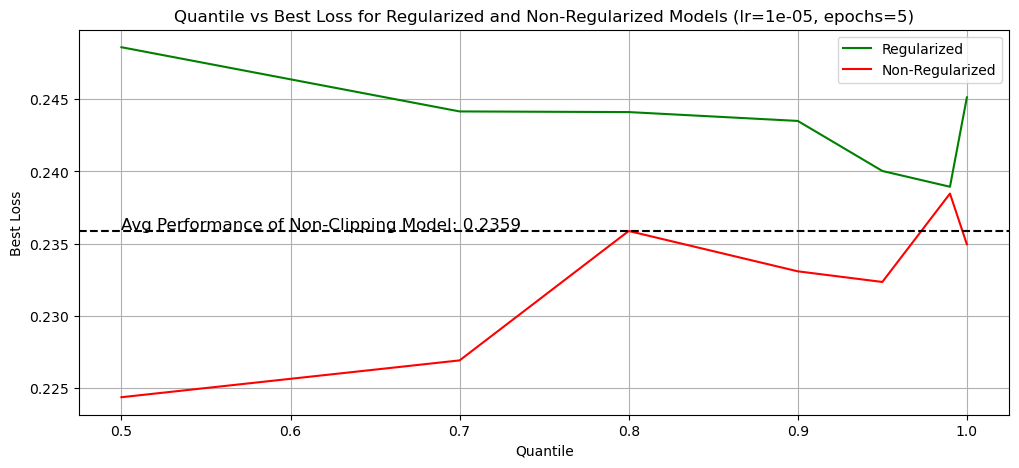

In [10]:
# Now, lets look at lr=1e-3 and epochs=3
# We want to plot the quantile vs best loss for regularized and non-regularized models
# Make regularized green and non-regularized red

import matplotlib.pyplot as plt

epochs = 5
lr = 1e-5

sub_frame = clipping_dataframe[(clipping_dataframe["epochs"] == epochs) & (clipping_dataframe["learning_rate"] == lr)]

base_performance = non_clipping_dataframe[(non_clipping_dataframe["epochs"] == epochs) & (non_clipping_dataframe["learning_rate"] == lr)]["best_loss"].item()

regularized = sub_frame[sub_frame["is_regularized"] == True]
non_regularized = sub_frame[sub_frame["is_regularized"] == False]

# Figsize 15
plt.figure(figsize=(12, 5))
plt.plot(regularized["quantile"], regularized["best_loss"], 'g', label="Regularized")
plt.plot(non_regularized["quantile"], non_regularized["best_loss"], 'r', label="Non-Regularized")

# Add a dotted horizontal line for the base performance
plt.axhline(y=base_performance, color='black', linestyle='--')
# Add a text label for the base performance
plt.text(0.5, base_performance + 0.0001, f"Avg Performance of Non-Clipping Model: {base_performance:.4f}", fontsize=12)

# Add grid
plt.grid()

# Add title
plt.title(f"Quantile vs Best Loss for Regularized and Non-Regularized Models (lr={lr}, epochs={epochs})")
plt.xlabel("Quantile")
plt.ylabel("Best Loss")

# Add legend
plt.legend()